In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
import ast
os.listdir('.')

['.ipynb_checkpoints',
 'Crime_Data_from_2020_to_Present.csv',
 'Crime_Desc.csv',
 'P002 - Crime.ipynb',
 'Premis_Desc.csv']

In [4]:
a = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df = a.drop(columns = ['Status Desc','DR_NO','AREA','Crm Cd','Mocodes','AREA NAME', 'LAT', 'LON',
                       'Rpt Dist No','Part 1-2','Premis Cd','Weapon Used Cd','Weapon Desc',
                       'Status','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','LOCATION','Cross Street'])
df = df[df['Vict Sex'].isin(['M', 'F'])]
df = df[df['Vict Age']>0]

In [5]:
# PART I - Revised Keyword Categories

# A. Property Crimes
property_keywords = [
    'THEFT', 'BURGLARY', 'SHOPLIFTING', 'STOLEN', 'PICKPOCKET',
    'VANDALISM', 'ARSON', 'TRESPASSING', 'ROBBERY'
]

# B. Fraud and Financial Crimes
fraud_keywords = [
    'EMBEZZLEMENT', 'FRAUD', 'EXTORTION'
]

# C. Violent Crimes
violent_keywords = [
    'ASSAULT', 'BATTERY', 'HOMICIDE', 'MANSLAUGHTER', 'SHOTS FIRED', 'BRANDISH WEAPON', 'STALKING'
]

# D. Sexual Offenses
sexual_keywords = [
    'RAPE', 'SEXUAL ASSAULT', 'INDECENT EXPOSURE', 'PENETRATION',
    'SODOMY', 'LEWD ACTS', 'CHILD PORNOGRAPHY'
]

# E. Crimes Against Children
child_keywords = [
    'CHILD ABUSE', 'CHILD NEGLECT', 'CHILD ABANDONMENT', 'CHILD PORNOGRAPHY', 'MINOR', 'KIDNAPPING'
]

# F. Public Order Offenses
public_order_keywords = [
    'DISTURBING THE PEACE', 'TRESPASSING', 'VANDALISM', 'ARSON'
]

# G. Drug and Vice Crimes
vice_keywords = [
    'PIMPING', 'PANDERING', 'PROSTITUTION', 'DRUG POSSESSION', 'DRUG TRAFFICKING'
]

# H. Traffic and Vehicle Offenses
traffic_keywords = [
    'RECKLESS DRIVING', 'FAILURE TO YIELD', 'DRIVING UNDER INFLUENCE', 'HIT AND RUN'
]

# I. Judicial and Legal Process Crimes
legal_keywords = [
    'CONTEMPT OF COURT', 'RESTRAINING ORDER VIOLATION', 'COURT VIOLATION'
]

# Function to categorize crimes
def categorize_crime(crime):
    crime_upper = crime.upper()
    if any(keyword in crime_upper for keyword in property_keywords):
        return 'Property Crimes'
    elif any(keyword in crime_upper for keyword in fraud_keywords):
        return 'Fraud and Financial Crimes'
    elif any(keyword in crime_upper for keyword in violent_keywords):
        return 'Violent Crimes'
    elif any(keyword in crime_upper for keyword in sexual_keywords):
        return 'Sexual Offenses'
    elif any(keyword in crime_upper for keyword in child_keywords):
        return 'Crimes Against Children'
    elif any(keyword in crime_upper for keyword in public_order_keywords):
        return 'Public Order Offenses'
    elif any(keyword in crime_upper for keyword in vice_keywords):
        return 'Drug and Vice Crimes'
    elif any(keyword in crime_upper for keyword in traffic_keywords):
        return 'Traffic and Vehicle Offenses'
    elif any(keyword in crime_upper for keyword in legal_keywords):
        return 'Judicial and Legal Process Crimes'
    else:
        return 'Miscellaneous Crimes'

# Apply categorization to your DataFrame
df['Crime_Category'] = df['Crm Cd Desc'].apply(categorize_crime)

# Removing
df = df.drop(columns = ['Crm Cd Desc'])

In [6]:
# PART II - Revised Premises Categories

def categorize_premises(df):
    category_mapping = {
        'Residential': [
            'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING', 'GARAGE/CARPORT', 
            'OTHER RESIDENCE', 'PORCH, RESIDENTIAL', 'CONDOMINIUM/TOWNHOUSE',
            'YARD (RESIDENTIAL/BUSINESS)', 'DRIVEWAY', 'MOBILE HOME',
            'BALCONY', 'PATIO', 'GROUP HOME', 'SINGLE RESIDENCE OCCUPANCY',
            'PROJECT/TENEMENT/PUBLIC HOUSING'
        ],
        'Commercial': [
            'OTHER BUSINESS', 'RESTAURANT/FAST FOOD', 'DEPARTMENT STORE', 
            'HOTEL', 'MARKET', 'GAS STATION', 'BANK', 'PUBLIC STORAGE',
            'OTHER STORE', 'CLOTHING STORE', 'MOTEL', 'OFFICE BUILDING/OFFICE',
            'MINI-MART', 'DRUG STORE', 'LIQUOR STORE', 'WAREHOUSE',
            'AUTO REPAIR SHOP', 'BEAUTY/BARBER SHOP'
        ],
        'Transportation': [
            'STREET', 'PARKING LOT', 'VEHICLE, PASSENGER/TRUCK', 
            'PARKING UNDERGROUND/BUILDING', 'ALLEY', 'TRANSPORTATION FACILITY',
            'MTA BUS', 'BUS STOP', 'LA UNION STATION', 'FREEWAY'
        ],
        'Public Spaces': [
            'SIDEWALK', 'PARK/PLAYGROUND', 'BEACH', 'CONSTRUCTION SITE',
            'TRANSIENT ENCAMPMENT', 'VACANT LOT', 'PUBLIC RESTROOM'
        ],
        'Educational': [
            'HIGH SCHOOL', 'JUNIOR HIGH SCHOOL', 'ELEMENTARY SCHOOL',
            'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 'LIBRARY', 'SPECIALTY SCHOOL',
            'PRIVATE SCHOOL/PRESCHOOL'
        ],
        'Healthcare': [
            'HOSPITAL', 'MEDICAL/DENTAL OFFICES', 
            'NURSING/CONVALESCENT/RETIREMENT HOME', 'MEDICAL MARIJUANA FACILITIES'
        ],
        'Entertainment Recreation': [
            'BAR/COCKTAIL/NIGHTCLUB', 'NIGHT CLUB', 'HEALTH SPA/GYM',
            'THEATRE/MOVIE', 'SPORTS ARENA', 'DODGER STADIUM', 'THE GROVE',
            'COLISEUM', 'SPORTS VENUE'
        ],
        'Government Services': [
            'POLICE FACILITY', 'GOVERNMENT FACILITY', 'POST OFFICE',
            'FIRE STATION', 'DETENTION/JAIL FACILITY'
        ],
        'Virtual Digital': [
            'CYBERSPACE', 'WEBSITE', 'AUTOMATED TELLER MACHINE'
        ],
        'Other': [
            'OTHER PREMISE', 'OTHER/OUTSIDE', 'MAIL BOX', 'STORAGE SHED',
            'ABANDONED BUILDING ABANDONED HOUSE', 'MISSIONS/SHELTERS'
        ]
    }
    
    # Create a reverse mapping for efficient categorization
    reverse_mapping = {}
    for category, premises in category_mapping.items():
        for premis in premises:
            reverse_mapping[premis] = category
    
    # Function to assign category
    def assign_category(premis):
        return reverse_mapping.get(premis, 'Other')  # More efficient key lookup
    
    # Create a new column with categories
    df['Premise_Category'] = df['Premis Desc'].apply(assign_category)

# After defining the function, ensure you call it on your DataFrame
categorize_premises(df)
df = df.drop(columns = ['Premis Desc'])

In [7]:
# PART III - Revised Ethnicity Categories

vict_descent_mapping = {
    'H': 'Hispanic/Latino',
    'W': 'White',
    'B': 'Black/African American',
    'A': 'Asian',  # Combined Asian countries
    'K': 'Asian',  # Korean
    'F': 'Asian',  # Filipino
    'C': 'Asian',  # Chinese
    'J': 'Asian',  # Japanese
    'V': 'Asian',  # Vietnamese
    'Z': 'Asian',  # Asian Indian
    'D': 'Asian',  # Cambodian
    'G': 'Asian',  # Guamanian
    'L': 'Asian',  # Laotian
    'O': 'Other/Unknown',  # Merged Other and Unknown
    'X': 'Other/Unknown',  # Unknown
    'P': 'Pacific Islander',  # Pacific Islander
    'U': 'Pacific Islander',  # Hawaiian
    'S': 'Pacific Islander',  # Samoan
    'I': 'American Indian/Alaskan Native'
}

df['Vict Descent'] = df['Vict Descent'].replace(vict_descent_mapping)

In [8]:
# PART V - Adjusting Date and Hour Columns
df['Date Rptd'] = pd.to_datetime(df['Date Rptd']).dt.date
df['DATE OCC'] = pd.to_datetime(df['DATE OCC']).dt.date



# Revised Hours - Part 1
def parse_time_occ(time_occ):
    try:
        # Convert to integer and string
        time_occ_int = int(time_occ)
        time_occ_str = str(time_occ_int)
        
        # Case 1: Length 1 or 2
        if len(time_occ_str) <= 2:
            hh = time_occ_int
            mm = 0
            # If hour is valid, format time
            if 0 <= hh <= 23:
                return '{:02d}:{:02d}'.format(hh, mm)
            elif 24 <= hh < 60:
                # Treat as minutes after midnight
                hh = 0
                mm = time_occ_int
                return '{:02d}:{:02d}'.format(hh, mm)
            else:
                return np.nan  # Invalid time
        
        # Case 2: Length 3 or 4
        elif len(time_occ_str) >= 3:
            # Pad with leading zeros if necessary
            time_occ_str = time_occ_str.zfill(4)
            hh = int(time_occ_str[:2])
            mm = int(time_occ_str[2:])
            # Validate time
            if 0 <= hh <= 23 and 0 <= mm <= 59:
                return '{:02d}:{:02d}'.format(hh, mm)
            else:
                return np.nan  # Invalid time
        else:
            return np.nan  # Invalid time
    except ValueError:
        return np.nan  # Non-integer values

df['TIME OCC Parsed'] = df['TIME OCC'].apply(parse_time_occ)


# Revised Hours - Part 2
def convert_to_hours(time_str):
    try:
        # Split the time string into hours and minutes
        hours_str, minutes_str = time_str.split(':')
        hours = int(hours_str)
        minutes = int(minutes_str)
        # Convert to decimal hours
        decimal_hours = round(hours + minutes / 60.0, 2)
        return decimal_hours
    except (ValueError, AttributeError):
        # Return None or NaN if time_str is not in the expected format
        return None
df['Time Occ'] = df['TIME OCC Parsed'].apply(convert_to_hours)


df = df.drop(columns = ['TIME OCC'])

In [78]:
df.reset_index(drop=True, inplace=True)
df['Invest Time'] = df['Date Rptd']-df['DATE OCC']
df['Invest Time'] = df['Invest Time'].dt.days
df

,Date Rptd,DATE OCC,Vict Age,Vict Sex,Vict Descent,Crime_Category,Premise_Category,TIME OCC Parsed,Time Occ,Invest Time
0,2020-02-09,2020-02-08,47,M,Other/Unknown,Property Crimes,Other,18:00,18.00,1
1,2023-05-10,2020-03-10,19,M,Other/Unknown,Property Crimes,Commercial,20:37,20.62,1156
2,2022-08-18,2020-08-17,28,M,Hispanic/Latino,Property Crimes,Public Spaces,12:00,12.00,731
3,2023-04-04,2020-12-01,41,M,Hispanic/Latino,Property Crimes,Residential,23:00,23.00,854
4,2023-04-04,2020-07-03,25,M,Hispanic/Latino,Property Crimes,Other,09:00,9.00,1005
...,...,...,...,...,...,...,...,...,...,...
705634,2024-02-11,2024-02-11,79,M,Other/Unknown,Property Crimes,Residential,19:20,19.33,0
705635,2024-01-14,2024-01-13,36,M,Hispanic/Latino,Violent Crimes,Transportation,07:20,7.33,1
705636,2024-02-20,2024-02-17,44,F,Other/Unknown,Property Crimes,Residential,23:30,23.50,3
705637,2024-01-16,2024-01-16,80,F,Other/Unknown,Violent Crimes,Transportation,15:10,15.17,0


In [107]:
male_data = df[df['Vict Sex'] == 'M']
female_data = df[df['Vict Sex'] == 'F']

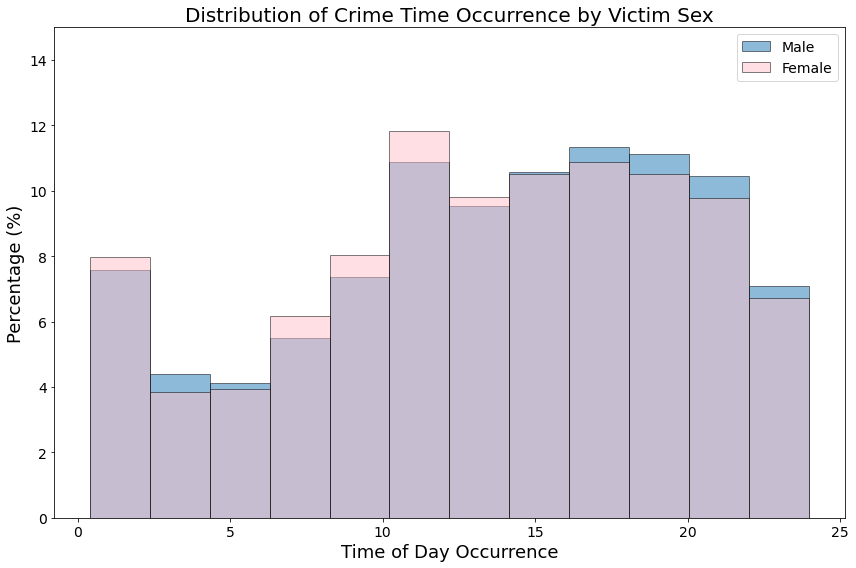

In [109]:
# Number of bins
bins = 12

# Calculate weights to convert counts to percentages for male data
weights_male = np.ones_like(male_data['Time Occ']) / len(male_data['Time Occ']) * 100

# Calculate weights to convert counts to percentages for female data
weights_female = np.ones_like(female_data['Time Occ']) / len(female_data['Time Occ']) * 100

# Create a figure and an axis with larger size (consistent format)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot male data histogram
ax.hist(
    male_data['Time Occ'],
    bins=bins,
    weights=weights_male,
    alpha=0.5,
    edgecolor='black',
    label='Male'
)

# Plot female data histogram on the same axes
ax.hist(
    female_data['Time Occ'],
    bins=bins,
    weights=weights_female,
    alpha=0.5,
    edgecolor='black',
    color='pink',
    label='Female'
)

# Set y-axis limits
ax.set_ylim(0, 15)

# Set labels and title with larger font sizes
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_xlabel('Time of Day Occurrence', fontsize=18)
ax.set_title('Distribution of Crime Time Occurrence by Victim Sex', fontsize=20)

# Set tick label size for x and y axes
ax.tick_params(axis='both', which='major', labelsize=14)

# Add legend with larger font size
ax.legend(fontsize=14)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [17]:
# Analyze the distribution of crime categories by gender
crime_category_gender = df.groupby(['Vict Sex', 'Crime_Category']).size().unstack(fill_value=0)

# Display the result to the user
crime_category_gender

Crime_Category,Crimes Against Children,Drug and Vice Crimes,Fraud and Financial Crimes,Judicial and Legal Process Crimes,Miscellaneous Crimes,Property Crimes,Public Order Offenses,Sexual Offenses,Traffic and Vehicle Offenses,Violent Crimes
Vict Sex,,,,,,,,,,
F,1174,150,573,1916,36962,188598,694,7371,26,108028
M,709,9,1546,727,21017,227861,704,919,134,106521


In [20]:
# Transpose the DataFrame so that crime categories are the index
df1 = crime_category_gender.transpose()
df1

Vict Sex,F,M
Crime_Category,,
Crimes Against Children,1174,709
Drug and Vice Crimes,150,9
Fraud and Financial Crimes,573,1546
Judicial and Legal Process Crimes,1916,727
Miscellaneous Crimes,36962,21017
Property Crimes,188598,227861
Public Order Offenses,694,704
Sexual Offenses,7371,919
Traffic and Vehicle Offenses,26,134


C:\Users\josha\AppData\Local\Temp/ipykernel_2588/3211178426.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


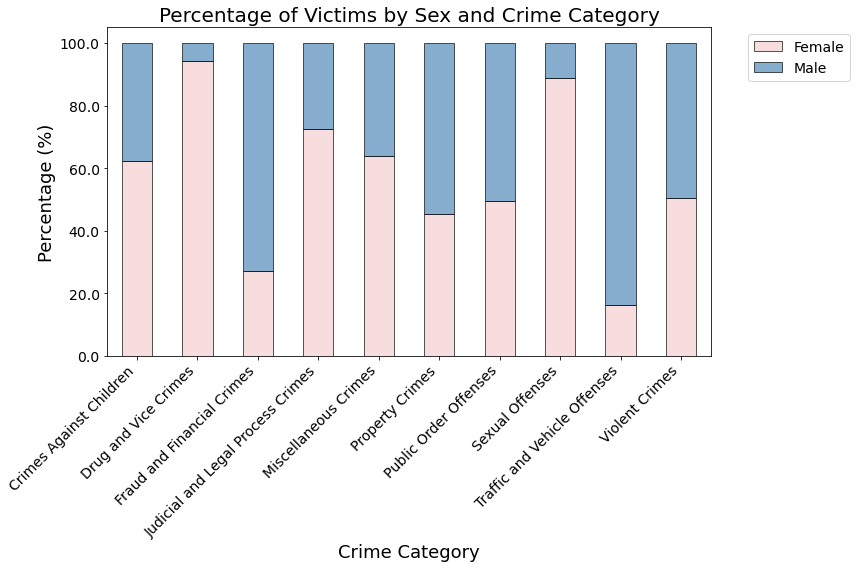

In [104]:
import matplotlib.pyplot as plt

# Calculate percentages
df_percent = df1.div(df1.sum(axis=1), axis=0) * 100

# Define colors: Light bluish pink for female and light blue for male
colors = ['#f4cccc', '#4682B4']

# Set larger font sizes for labels globally
plt.rcParams.update({'axes.titlesize': 20, 'axes.labelsize': 18, 'xtick.labelsize': 14, 'ytick.labelsize': 14})

# Plot the stacked percentage bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted figure size for consistency

ax = df_percent.plot(kind='bar', stacked=True, figsize=(12, 8), edgecolor='black', color=colors, alpha=0.65, ax=ax)

# Customize the plot with larger title and labels
ax.set_title('Percentage of Victims by Sex and Crime Category', fontsize=20)
ax.set_xlabel('Crime Category', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_xticklabels(df_percent.index, rotation=45, ha='right', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=14)

# Adjust legend with larger font size
ax.legend(labels=['Female', 'Male'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()

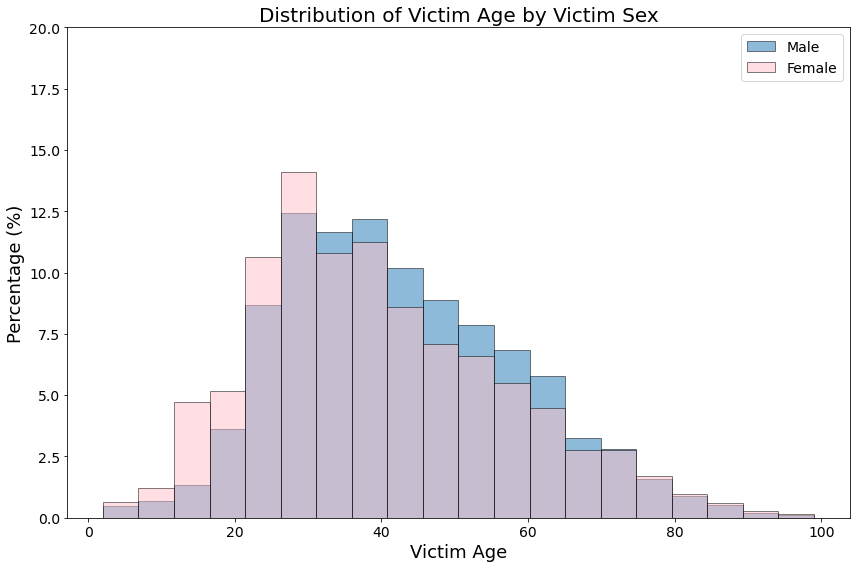

In [103]:
# Number of bins
bins = 20

# Calculate weights to convert counts to percentages for male data
weights_male = np.ones_like(male_data['Vict Age']) / len(male_data['Vict Age']) * 100

# Calculate weights to convert counts to percentages for female data
weights_female = np.ones_like(female_data['Vict Age']) / len(female_data['Vict Age']) * 100

# Create a figure and an axis with larger size (consistent format)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot male data histogram
ax.hist(
    male_data['Vict Age'],
    bins=bins,
    weights=weights_male,
    alpha=0.5,
    edgecolor='black',
    label='Male'
)

# Plot female data histogram on the same axes
ax.hist(
    female_data['Vict Age'],
    bins=bins,
    weights=weights_female,
    alpha=0.5,
    edgecolor='black',
    color='pink',
    label='Female'
)

# Set y-axis limits
ax.set_ylim(0, 20)

# Set the labels and title with larger font sizes
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_xlabel('Victim Age', fontsize=18)
ax.set_title('Distribution of Victim Age by Victim Sex', fontsize=20)

# Set tick label size for x and y axes
ax.tick_params(axis='both', which='major', labelsize=14)

# Add legend with larger font size
ax.legend(fontsize=14)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

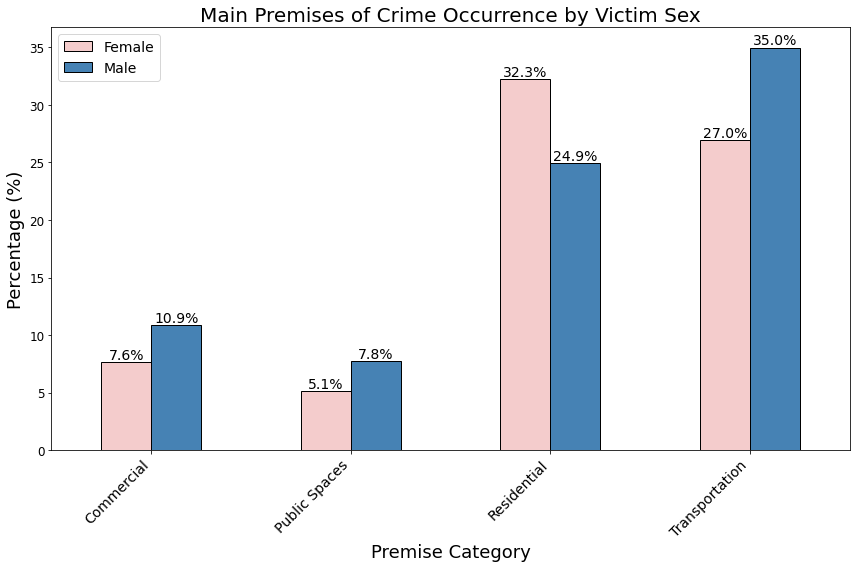

In [100]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Step 1: Filter out rows where 'Premise_Category' is 'Other'
df_filtered = df

# Step 2: Calculate counts of occurrences for each Premise_Category and Vict Sex
premise_counts = df_filtered.groupby(['Premise_Category', 'Vict Sex']).size().reset_index(name='count')

# Step 3: Calculate total counts for each sex to get percentages
total_counts_sex = df_filtered.groupby('Vict Sex').size().reset_index(name='total_count')

# Step 4: Merge total counts into premise_counts to calculate percentage
premise_counts = pd.merge(premise_counts, total_counts_sex, on='Vict Sex')
premise_counts['percentage'] = premise_counts['count'] / premise_counts['total_count'] * 100

# Step 5: Filter top 6 premise categories for each Vict Sex
top_6_premises = premise_counts.groupby('Vict Sex').apply(lambda x: x.nlargest(5, 'percentage')).reset_index(drop=True)
top_6_premises = top_6_premises[top_6_premises['Premise_Category'] != 'Other']

# Step 6: Create a pivot table for easier plotting (Premise_Category as rows, Vict Sex as columns)
pivot_data = top_6_premises.pivot(index='Premise_Category', columns='Vict Sex', values='percentage').fillna(0)

# Step 7: Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size to be consistent with the previous plot

# Define colors for Male and Female
colors = ['#f4cccc', '#4682B4']  # Pink for Female, Blue for Male

# Plot the bar chart
pivot_data.plot(kind='bar', ax=ax, color=colors, edgecolor='black')

# Customize the plot
ax.set_ylabel('Percentage (%)', fontsize=18)  # Larger font for y-axis label
ax.set_xlabel('Premise Category', fontsize=18)  # Larger font for x-axis label
ax.set_title('Main Premises of Crime Occurrence by Victim Sex', fontsize=20)  # Larger font for title
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=14)  # Larger font for x-tick labels
ax.legend(labels=['Female', 'Male'], fontsize=14)  # Larger font for legend

# Display percentages on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=14)  # Larger font for bar labels

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

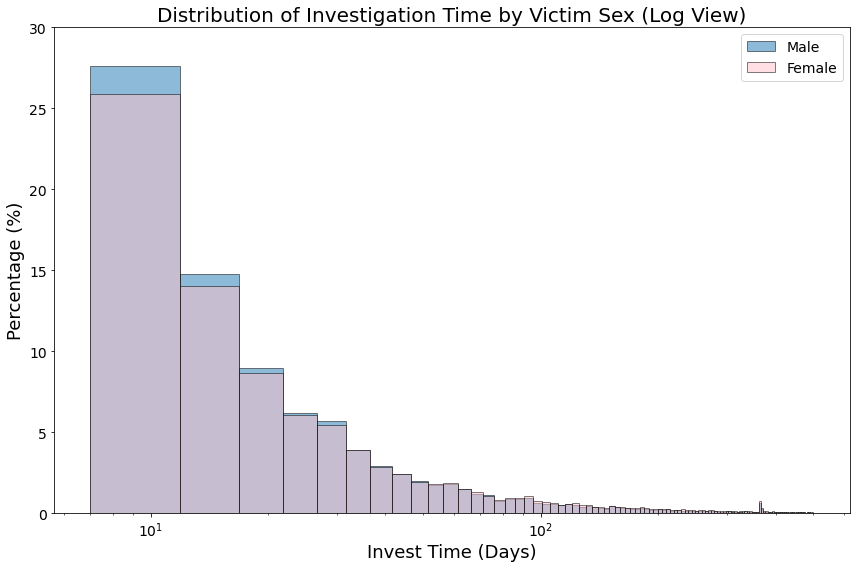

In [98]:
# Create a figure and an axis with larger size (width, height)
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size as needed

# Plot male data histogram
ax.hist(
    male_data['Invest Time'],
    bins=bins,
    weights=weights_male,
    alpha=0.5,
    edgecolor='black',
    label='Male'
)

# Plot female data histogram on the same axes
ax.hist(
    female_data['Invest Time'],
    bins=bins,
    weights=weights_female,
    alpha=0.5,
    edgecolor='black',
    color='pink',
    label='Female'
)

# Set y-axis limits
ax.set_ylim(0, 30)

# Set the x-axis to log scale
ax.set_xscale('log')

# Set labels and title with larger font sizes
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_xlabel('Invest Time (Days)', fontsize=18)
ax.set_title('Distribution of Investigation Time by Victim Sex (Log View)', fontsize=20)

# Set tick parameters (axis labels) font size
ax.tick_params(axis='both', which='major', labelsize=14)

# Add legend with larger font size
ax.legend(fontsize=14)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()